In [1]:
import numpy as np
import math
from scipy import integrate
import matplotlib.pyplot as plt

In [2]:
def lap_noise(data, epsilon, N):
    pri_data = data + np.random.laplace(loc = 0.0, scale = (16*N*(N*N+6*N+4)/((N+18)*(N*N+8*N-4)))/epsilon, size=data.shape)
    
    min = 10000
    
    for i in range(10000):
        if pri_data[i] > 0 and pri_data[i] < min:
            min = pri_data[i]
    
    for i in range(10000):
        if pri_data[i] < 0:
            pri_data[i] = min
    
    return pri_data

In [3]:
def KL(data, pri_data):
    data /= np.sum(data)
    pri_data /= np.sum(pri_data)
    kl = 0
    for i in range(10000):
        kl += data[i] * np.log(data[i]) - data[i] * np.log(pri_data[i])
    return kl

In [4]:
y = np.zeros((10, 7, 10))

for j in range(10):
    N = 1000
    
    data = np.zeros((10,10000))
    
    for i in range(10):
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][0][j] = KL(data[i], lap_noise(data[i], 0.1, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][1][j] = KL(data[i], lap_noise(data[i], 0.5, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][2][j] = KL(data[i], lap_noise(data[i], 1, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][3][j] = KL(data[i], lap_noise(data[i], 2, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][4][j] = KL(data[i], lap_noise(data[i], 5, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][5][j] = KL(data[i], lap_noise(data[i], 7, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][6][j] = KL(data[i], lap_noise(data[i], 10, N))

In [5]:
chi_KL = np.zeros((10, 7))
chi_KL_err = np.zeros((2,10,7))

for i in range(10):
    for k in range(7):
        y[i][k].sort()
        chi_KL[i][k] = (y[i][k][4] + y[i][k][5])/2
        chi_KL_err[0][i][k] = chi_KL[i][k] - y[i][k][0]
        chi_KL_err[1][i][k] = y[i][k][9] - chi_KL[i][k]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


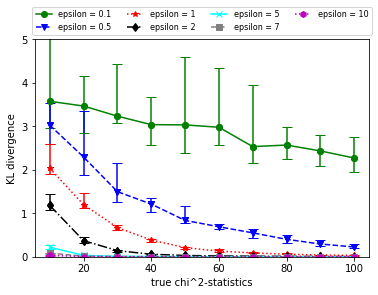

In [6]:
x = np.zeros(10)

for i in range(10):
    x[i] = i*10 + 10


fig = plt.figure()
plt.ylim(0,5)
plt.errorbar(x, chi_KL[:,0], yerr = chi_KL_err[:,:,0], capsize=5, fmt='o', ecolor='green', markeredgecolor = "green", color='green')
plt.plot(x, chi_KL[:,0], marker="o", color = "green", linestyle = "-", label = "epsilon = 0.1")
plt.errorbar(x, chi_KL[:,1], yerr = chi_KL_err[:,:,1], capsize=5, fmt='v', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.plot(x, chi_KL[:,1], marker="v", color = "blue", linestyle = "--", label = "epsilon = 0.5")
plt.errorbar(x, chi_KL[:,2], yerr = chi_KL_err[:,:,2], capsize=5, fmt='*', ecolor='red', markeredgecolor = "red", color='red')
plt.plot(x, chi_KL[:,2], marker="*", color = "red", linestyle = "dotted", label = "epsilon = 1")
plt.errorbar(x, chi_KL[:,3], yerr = chi_KL_err[:,:,3], capsize=5, fmt='d', ecolor='black', markeredgecolor = "black", color='black')
plt.plot(x, chi_KL[:,3], marker="d", color = "black", linestyle = "dashdot", label = "epsilon = 2")
plt.errorbar(x, chi_KL[:,4], yerr = chi_KL_err[:,:,4], capsize=5, fmt='x', ecolor='cyan', markeredgecolor = "cyan", color='cyan')
plt.plot(x, chi_KL[:,4], marker="x", color = "cyan", linestyle = "-", label = "epsilon = 5")
plt.errorbar(x, chi_KL[:,5], yerr = chi_KL_err[:,:,5], capsize=5, fmt='s', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(x, chi_KL[:,5], marker="s", color = "gray", linestyle = "--", label = "epsilon = 7")
plt.errorbar(x, chi_KL[:,6], yerr = chi_KL_err[:,:,6], capsize=5, fmt='h', ecolor='m', markeredgecolor = "m", color='m')
plt.plot(x, chi_KL[:,6], marker="h", color = "m", linestyle = "dotted", label = "epsilon = 10")
plt.legend(bbox_to_anchor=(0.5, 1.02), loc='lower center', borderaxespad=0, ncol=4, fontsize=8)
plt.xlabel("true chi^2-statistics")
plt.ylabel("KL divergence")
fig.savefig("CA_chi^2_N=1000.png")
fig.savefig("fig/CA_chi^2_N=1000.eps")

In [7]:
y = np.zeros((10, 7, 10))

for j in range(10):
    N = 10000
    
    data = np.zeros((10,10000))
    
    for i in range(10):
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][0][j] = KL(data[i], lap_noise(data[i], 0.1, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][1][j] = KL(data[i], lap_noise(data[i], 0.5, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][2][j] = KL(data[i], lap_noise(data[i], 1, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][3][j] = KL(data[i], lap_noise(data[i], 2, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][4][j] = KL(data[i], lap_noise(data[i], 5, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][5][j] = KL(data[i], lap_noise(data[i], 7, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][6][j] = KL(data[i], lap_noise(data[i], 10, N))
        
chi_KL = np.zeros((10, 7))
chi_KL_err = np.zeros((2,10,7))

for i in range(10):
    for k in range(7):
        y[i][k].sort()
        chi_KL[i][k] = (y[i][k][4] + y[i][k][5])/2
        chi_KL_err[0][i][k] = chi_KL[i][k] - y[i][k][0]
        chi_KL_err[1][i][k] = y[i][k][9] - chi_KL[i][k]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


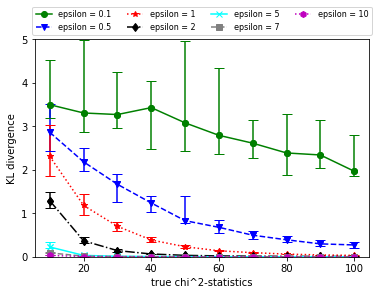

In [8]:
x = np.zeros(10)

for i in range(10):
    x[i] = i*10 + 10


fig = plt.figure()
plt.ylim(0,5)
plt.errorbar(x, chi_KL[:,0], yerr = chi_KL_err[:,:,0], capsize=5, fmt='o', ecolor='green', markeredgecolor = "green", color='green')
plt.plot(x, chi_KL[:,0], marker="o", color = "green", linestyle = "-", label = "epsilon = 0.1")
plt.errorbar(x, chi_KL[:,1], yerr = chi_KL_err[:,:,1], capsize=5, fmt='v', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.plot(x, chi_KL[:,1], marker="v", color = "blue", linestyle = "--", label = "epsilon = 0.5")
plt.errorbar(x, chi_KL[:,2], yerr = chi_KL_err[:,:,2], capsize=5, fmt='*', ecolor='red', markeredgecolor = "red", color='red')
plt.plot(x, chi_KL[:,2], marker="*", color = "red", linestyle = "dotted", label = "epsilon = 1")
plt.errorbar(x, chi_KL[:,3], yerr = chi_KL_err[:,:,3], capsize=5, fmt='d', ecolor='black', markeredgecolor = "black", color='black')
plt.plot(x, chi_KL[:,3], marker="d", color = "black", linestyle = "dashdot", label = "epsilon = 2")
plt.errorbar(x, chi_KL[:,4], yerr = chi_KL_err[:,:,4], capsize=5, fmt='x', ecolor='cyan', markeredgecolor = "cyan", color='cyan')
plt.plot(x, chi_KL[:,4], marker="x", color = "cyan", linestyle = "-", label = "epsilon = 5")
plt.errorbar(x, chi_KL[:,5], yerr = chi_KL_err[:,:,5], capsize=5, fmt='s', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(x, chi_KL[:,5], marker="s", color = "gray", linestyle = "--", label = "epsilon = 7")
plt.errorbar(x, chi_KL[:,6], yerr = chi_KL_err[:,:,6], capsize=5, fmt='h', ecolor='m', markeredgecolor = "m", color='m')
plt.plot(x, chi_KL[:,6], marker="h", color = "m", linestyle = "dotted", label = "epsilon = 10")
plt.legend(bbox_to_anchor=(0.5, 1.02), loc='lower center', borderaxespad=0, ncol=4, fontsize=8)
plt.xlabel("true chi^2-statistics")
plt.ylabel("KL divergence")
fig.savefig("CA_chi^2_N=10000.png")
fig.savefig("fig/CA_chi^2_N=10000.eps")

In [9]:
y = np.zeros((10, 7, 10))

for j in range(10):
    N = 50000
    
    data = np.zeros((10,10000))
    
    for i in range(10):
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][0][j] = KL(data[i], lap_noise(data[i], 0.1, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][1][j] = KL(data[i], lap_noise(data[i], 0.5, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][2][j] = KL(data[i], lap_noise(data[i], 1, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][3][j] = KL(data[i], lap_noise(data[i], 2, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][4][j] = KL(data[i], lap_noise(data[i], 5, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][5][j] = KL(data[i], lap_noise(data[i], 7, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][6][j] = KL(data[i], lap_noise(data[i], 10, N))
        
chi_KL = np.zeros((10, 7))
chi_KL_err = np.zeros((2,10,7))

for i in range(10):
    for k in range(7):
        y[i][k].sort()
        chi_KL[i][k] = (y[i][k][4] + y[i][k][5])/2
        chi_KL_err[0][i][k] = chi_KL[i][k] - y[i][k][0]
        chi_KL_err[1][i][k] = y[i][k][9] - chi_KL[i][k]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


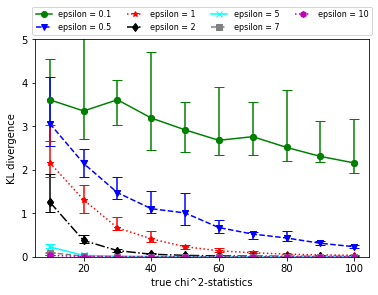

In [10]:
x = np.zeros(10)

for i in range(10):
    x[i] = i*10 + 10


fig = plt.figure()
plt.ylim(0,5)
plt.errorbar(x, chi_KL[:,0], yerr = chi_KL_err[:,:,0], capsize=5, fmt='o', ecolor='green', markeredgecolor = "green", color='green')
plt.plot(x, chi_KL[:,0], marker="o", color = "green", linestyle = "-", label = "epsilon = 0.1")
plt.errorbar(x, chi_KL[:,1], yerr = chi_KL_err[:,:,1], capsize=5, fmt='v', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.plot(x, chi_KL[:,1], marker="v", color = "blue", linestyle = "--", label = "epsilon = 0.5")
plt.errorbar(x, chi_KL[:,2], yerr = chi_KL_err[:,:,2], capsize=5, fmt='*', ecolor='red', markeredgecolor = "red", color='red')
plt.plot(x, chi_KL[:,2], marker="*", color = "red", linestyle = "dotted", label = "epsilon = 1")
plt.errorbar(x, chi_KL[:,3], yerr = chi_KL_err[:,:,3], capsize=5, fmt='d', ecolor='black', markeredgecolor = "black", color='black')
plt.plot(x, chi_KL[:,3], marker="d", color = "black", linestyle = "dashdot", label = "epsilon = 2")
plt.errorbar(x, chi_KL[:,4], yerr = chi_KL_err[:,:,4], capsize=5, fmt='x', ecolor='cyan', markeredgecolor = "cyan", color='cyan')
plt.plot(x, chi_KL[:,4], marker="x", color = "cyan", linestyle = "-", label = "epsilon = 5")
plt.errorbar(x, chi_KL[:,5], yerr = chi_KL_err[:,:,5], capsize=5, fmt='s', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(x, chi_KL[:,5], marker="s", color = "gray", linestyle = "--", label = "epsilon = 7")
plt.errorbar(x, chi_KL[:,6], yerr = chi_KL_err[:,:,6], capsize=5, fmt='h', ecolor='m', markeredgecolor = "m", color='m')
plt.plot(x, chi_KL[:,6], marker="h", color = "m", linestyle = "dotted", label = "epsilon = 10")
plt.legend(bbox_to_anchor=(0.5, 1.02), loc='lower center', borderaxespad=0, ncol=4, fontsize=8)
plt.xlabel("true chi^2-statistics")
plt.ylabel("KL divergence")
fig.savefig("CA_chi^2_N=50000.png")
fig.savefig("fig/CA_chi^2_N=50000.eps")

In [11]:
y = np.zeros((10, 7, 10))

for j in range(10):
    N = 100000
    
    data = np.zeros((10,10000))
    
    for i in range(10):
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][0][j] = KL(data[i], lap_noise(data[i], 0.1, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][1][j] = KL(data[i], lap_noise(data[i], 0.5, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][2][j] = KL(data[i], lap_noise(data[i], 1, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][3][j] = KL(data[i], lap_noise(data[i], 2, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][4][j] = KL(data[i], lap_noise(data[i], 5, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][5][j] = KL(data[i], lap_noise(data[i], 7, N))
        data[i] = np.zeros(10000) + (i*10+10)
        y[i][6][j] = KL(data[i], lap_noise(data[i], 10, N))
        
chi_KL = np.zeros((10, 7))
chi_KL_err = np.zeros((2,10,7))

for i in range(10):
    for k in range(7):
        y[i][k].sort()
        chi_KL[i][k] = (y[i][k][4] + y[i][k][5])/2
        chi_KL_err[0][i][k] = chi_KL[i][k] - y[i][k][0]
        chi_KL_err[1][i][k] = y[i][k][9] - chi_KL[i][k]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


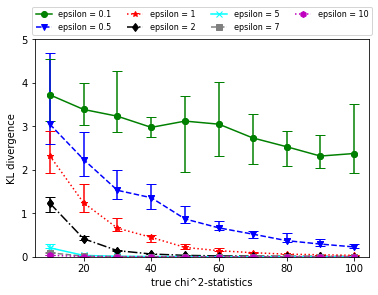

In [12]:
x = np.zeros(10)

for i in range(10):
    x[i] = i*10 + 10


fig = plt.figure()
plt.ylim(0,5)
plt.errorbar(x, chi_KL[:,0], yerr = chi_KL_err[:,:,0], capsize=5, fmt='o', ecolor='green', markeredgecolor = "green", color='green')
plt.plot(x, chi_KL[:,0], marker="o", color = "green", linestyle = "-", label = "epsilon = 0.1")
plt.errorbar(x, chi_KL[:,1], yerr = chi_KL_err[:,:,1], capsize=5, fmt='v', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.plot(x, chi_KL[:,1], marker="v", color = "blue", linestyle = "--", label = "epsilon = 0.5")
plt.errorbar(x, chi_KL[:,2], yerr = chi_KL_err[:,:,2], capsize=5, fmt='*', ecolor='red', markeredgecolor = "red", color='red')
plt.plot(x, chi_KL[:,2], marker="*", color = "red", linestyle = "dotted", label = "epsilon = 1")
plt.errorbar(x, chi_KL[:,3], yerr = chi_KL_err[:,:,3], capsize=5, fmt='d', ecolor='black', markeredgecolor = "black", color='black')
plt.plot(x, chi_KL[:,3], marker="d", color = "black", linestyle = "dashdot", label = "epsilon = 2")
plt.errorbar(x, chi_KL[:,4], yerr = chi_KL_err[:,:,4], capsize=5, fmt='x', ecolor='cyan', markeredgecolor = "cyan", color='cyan')
plt.plot(x, chi_KL[:,4], marker="x", color = "cyan", linestyle = "-", label = "epsilon = 5")
plt.errorbar(x, chi_KL[:,5], yerr = chi_KL_err[:,:,5], capsize=5, fmt='s', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(x, chi_KL[:,5], marker="s", color = "gray", linestyle = "--", label = "epsilon = 7")
plt.errorbar(x, chi_KL[:,6], yerr = chi_KL_err[:,:,6], capsize=5, fmt='h', ecolor='m', markeredgecolor = "m", color='m')
plt.plot(x, chi_KL[:,6], marker="h", color = "m", linestyle = "dotted", label = "epsilon = 10")
plt.legend(bbox_to_anchor=(0.5, 1.02), loc='lower center', borderaxespad=0, ncol=4, fontsize=8)
plt.xlabel("true chi^2-statistics")
plt.ylabel("KL divergence")
fig.savefig("CA_chi^2_N=100000.png")
fig.savefig("fig/CA_chi^2_N=100000.eps")

In [13]:
def chi2p(i,epsilon,N):
    data[i] = np.zeros(10000) + (i*10+10)
    pri_data[i] = lap_noise(data[i], epsilon, N)
    for j in range(10000):
        p_data[i][j] = np.exp(-data[i][j]/2)
        p_pri_data[i][j] = np.exp(-pri_data[i][j]/2)
        if(p_pri_data[i][j] <= 10**(-300)):
            p_pri_data[i][j] = 10**(-300)

In [14]:
N = 1000

p_data = np.zeros((10, 10000))
pri_data = np.zeros((10, 10000))
p_pri_data = np.zeros((10, 10000))
p_chi_KL = np.zeros((10, 7))

y = np.zeros((10, 7, 10))

for j in range(10):
    for i in range(10):
        chi2p(i,0.1,N)
        y[i][0][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,0.5,N)
        y[i][1][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,1,N)
        y[i][2][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,2,N)
        y[i][3][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,5,N)
        y[i][4][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,7,N)
        y[i][5][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,10,N)
        y[i][6][j] = KL(p_data[i], p_pri_data[i])

p_chi_KL = np.zeros((10, 7))
p_chi_KL_err = np.zeros((2,10,7))

for i in range(10):
    for k in range(7):
        y[i][k].sort()
        p_chi_KL[i][k] = (y[i][k][4] + y[i][k][5])/2
        p_chi_KL_err[0][i][k] = p_chi_KL[i][k] - y[i][k][0]
        p_chi_KL_err[1][i][k] = y[i][k][9] - p_chi_KL[i][k]

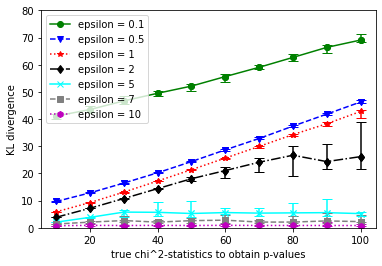

In [15]:
x = np.zeros(10)

for i in range(10):
    x[i] = i*10 + 10


fig = plt.figure()
plt.ylim(0,80)
plt.errorbar(x, p_chi_KL[:,0], yerr = p_chi_KL_err[:,:,0], capsize=5, fmt='o', ecolor='green', markeredgecolor = "green", color='green')
plt.plot(x, p_chi_KL[:,0], marker="o", color = "green", linestyle = "-", label = "epsilon = 0.1")
plt.errorbar(x, p_chi_KL[:,1], yerr = p_chi_KL_err[:,:,1], capsize=5, fmt='v', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.plot(x, p_chi_KL[:,1], marker="v", color = "blue", linestyle = "--", label = "epsilon = 0.5")
plt.errorbar(x, p_chi_KL[:,2], yerr = p_chi_KL_err[:,:,2], capsize=5, fmt='*', ecolor='red', markeredgecolor = "red", color='red')
plt.plot(x, p_chi_KL[:,2], marker="*", color = "red", linestyle = "dotted", label = "epsilon = 1")
plt.errorbar(x, p_chi_KL[:,3], yerr = p_chi_KL_err[:,:,3], capsize=5, fmt='d', ecolor='black', markeredgecolor = "black", color='black')
plt.plot(x, p_chi_KL[:,3], marker="d", color = "black", linestyle = "dashdot", label = "epsilon = 2")
plt.errorbar(x, p_chi_KL[:,4], yerr = p_chi_KL_err[:,:,4], capsize=5, fmt='x', ecolor='cyan', markeredgecolor = "cyan", color='cyan')
plt.plot(x, p_chi_KL[:,4], marker="x", color = "cyan", linestyle = "-", label = "epsilon = 5")
plt.errorbar(x, p_chi_KL[:,5], yerr = p_chi_KL_err[:,:,5], capsize=5, fmt='s', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(x, p_chi_KL[:,5], marker="s", color = "gray", linestyle = "--", label = "epsilon = 7")
plt.errorbar(x, p_chi_KL[:,6], yerr = p_chi_KL_err[:,:,6], capsize=5, fmt='h', ecolor='m', markeredgecolor = "m", color='m')
plt.plot(x, p_chi_KL[:,6], marker="h", color = "m", linestyle = "dotted", label = "epsilon = 10")
plt.legend()
plt.xlabel("true chi^2-statistics to obtain p-values")
plt.ylabel("KL divergence")
fig.savefig("CA_p_chi^2_N=1000.png")

In [16]:
N = 10000

p_data = np.zeros((10, 10000))
pri_data = np.zeros((10, 10000))
p_pri_data = np.zeros((10, 10000))
p_chi_KL = np.zeros((10, 7))

y = np.zeros((10, 7, 10))

for j in range(10):
    for i in range(10):
        chi2p(i,0.1,N)
        y[i][0][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,0.5,N)
        y[i][1][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,1,N)
        y[i][2][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,2,N)
        y[i][3][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,5,N)
        y[i][4][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,7,N)
        y[i][5][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,10,N)
        y[i][6][j] = KL(p_data[i], p_pri_data[i])

p_chi_KL = np.zeros((10, 7))
p_chi_KL_err = np.zeros((2,10,7))

for i in range(10):
    for k in range(7):
        y[i][k].sort()
        p_chi_KL[i][k] = (y[i][k][4] + y[i][k][5])/2
        p_chi_KL_err[0][i][k] = p_chi_KL[i][k] - y[i][k][0]
        p_chi_KL_err[1][i][k] = y[i][k][9] - p_chi_KL[i][k]

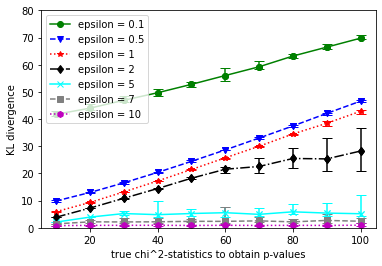

In [17]:
x = np.zeros(10)

for i in range(10):
    x[i] = i*10 + 10


fig = plt.figure()
plt.ylim(0,80)
plt.errorbar(x, p_chi_KL[:,0], yerr = p_chi_KL_err[:,:,0], capsize=5, fmt='o', ecolor='green', markeredgecolor = "green", color='green')
plt.plot(x, p_chi_KL[:,0], marker="o", color = "green", linestyle = "-", label = "epsilon = 0.1")
plt.errorbar(x, p_chi_KL[:,1], yerr = p_chi_KL_err[:,:,1], capsize=5, fmt='v', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.plot(x, p_chi_KL[:,1], marker="v", color = "blue", linestyle = "--", label = "epsilon = 0.5")
plt.errorbar(x, p_chi_KL[:,2], yerr = p_chi_KL_err[:,:,2], capsize=5, fmt='*', ecolor='red', markeredgecolor = "red", color='red')
plt.plot(x, p_chi_KL[:,2], marker="*", color = "red", linestyle = "dotted", label = "epsilon = 1")
plt.errorbar(x, p_chi_KL[:,3], yerr = p_chi_KL_err[:,:,3], capsize=5, fmt='d', ecolor='black', markeredgecolor = "black", color='black')
plt.plot(x, p_chi_KL[:,3], marker="d", color = "black", linestyle = "dashdot", label = "epsilon = 2")
plt.errorbar(x, p_chi_KL[:,4], yerr = p_chi_KL_err[:,:,4], capsize=5, fmt='x', ecolor='cyan', markeredgecolor = "cyan", color='cyan')
plt.plot(x, p_chi_KL[:,4], marker="x", color = "cyan", linestyle = "-", label = "epsilon = 5")
plt.errorbar(x, p_chi_KL[:,5], yerr = p_chi_KL_err[:,:,5], capsize=5, fmt='s', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(x, p_chi_KL[:,5], marker="s", color = "gray", linestyle = "--", label = "epsilon = 7")
plt.errorbar(x, p_chi_KL[:,6], yerr = p_chi_KL_err[:,:,6], capsize=5, fmt='h', ecolor='m', markeredgecolor = "m", color='m')
plt.plot(x, p_chi_KL[:,6], marker="h", color = "m", linestyle = "dotted", label = "epsilon = 10")
plt.legend()
plt.xlabel("true chi^2-statistics to obtain p-values")
plt.ylabel("KL divergence")
fig.savefig("CA_p_chi^2_N=10000.png")

In [18]:
N = 50000

p_data = np.zeros((10, 10000))
pri_data = np.zeros((10, 10000))
p_pri_data = np.zeros((10, 10000))
p_chi_KL = np.zeros((10, 7))

y = np.zeros((10, 7, 10))

for j in range(10):
    for i in range(10):
        chi2p(i,0.1,N)
        y[i][0][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,0.5,N)
        y[i][1][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,1,N)
        y[i][2][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,2,N)
        y[i][3][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,5,N)
        y[i][4][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,7,N)
        y[i][5][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,10,N)
        y[i][6][j] = KL(p_data[i], p_pri_data[i])

p_chi_KL = np.zeros((10, 7))
p_chi_KL_err = np.zeros((2,10,7))

for i in range(10):
    for k in range(7):
        y[i][k].sort()
        p_chi_KL[i][k] = (y[i][k][4] + y[i][k][5])/2
        p_chi_KL_err[0][i][k] = p_chi_KL[i][k] - y[i][k][0]
        p_chi_KL_err[1][i][k] = y[i][k][9] - p_chi_KL[i][k]

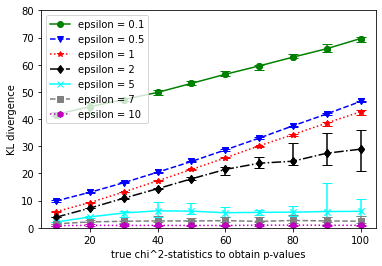

In [19]:
x = np.zeros(10)

for i in range(10):
    x[i] = i*10 + 10


fig = plt.figure()
plt.ylim(0,80)
plt.errorbar(x, p_chi_KL[:,0], yerr = p_chi_KL_err[:,:,0], capsize=5, fmt='o', ecolor='green', markeredgecolor = "green", color='green')
plt.plot(x, p_chi_KL[:,0], marker="o", color = "green", linestyle = "-", label = "epsilon = 0.1")
plt.errorbar(x, p_chi_KL[:,1], yerr = p_chi_KL_err[:,:,1], capsize=5, fmt='v', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.plot(x, p_chi_KL[:,1], marker="v", color = "blue", linestyle = "--", label = "epsilon = 0.5")
plt.errorbar(x, p_chi_KL[:,2], yerr = p_chi_KL_err[:,:,2], capsize=5, fmt='*', ecolor='red', markeredgecolor = "red", color='red')
plt.plot(x, p_chi_KL[:,2], marker="*", color = "red", linestyle = "dotted", label = "epsilon = 1")
plt.errorbar(x, p_chi_KL[:,3], yerr = p_chi_KL_err[:,:,3], capsize=5, fmt='d', ecolor='black', markeredgecolor = "black", color='black')
plt.plot(x, p_chi_KL[:,3], marker="d", color = "black", linestyle = "dashdot", label = "epsilon = 2")
plt.errorbar(x, p_chi_KL[:,4], yerr = p_chi_KL_err[:,:,4], capsize=5, fmt='x', ecolor='cyan', markeredgecolor = "cyan", color='cyan')
plt.plot(x, p_chi_KL[:,4], marker="x", color = "cyan", linestyle = "-", label = "epsilon = 5")
plt.errorbar(x, p_chi_KL[:,5], yerr = p_chi_KL_err[:,:,5], capsize=5, fmt='s', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(x, p_chi_KL[:,5], marker="s", color = "gray", linestyle = "--", label = "epsilon = 7")
plt.errorbar(x, p_chi_KL[:,6], yerr = p_chi_KL_err[:,:,6], capsize=5, fmt='h', ecolor='m', markeredgecolor = "m", color='m')
plt.plot(x, p_chi_KL[:,6], marker="h", color = "m", linestyle = "dotted", label = "epsilon = 10")
plt.legend()
plt.xlabel("true chi^2-statistics to obtain p-values")
plt.ylabel("KL divergence")
fig.savefig("CA_p_chi^2_N=50000.png")

In [20]:
N = 100000

p_data = np.zeros((10, 10000))
pri_data = np.zeros((10, 10000))
p_pri_data = np.zeros((10, 10000))
p_chi_KL = np.zeros((10, 7))

y = np.zeros((10, 7, 10))

for j in range(10):
    for i in range(10):
        chi2p(i,0.1,N)
        y[i][0][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,0.5,N)
        y[i][1][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,1,N)
        y[i][2][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,2,N)
        y[i][3][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,5,N)
        y[i][4][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,7,N)
        y[i][5][j] = KL(p_data[i], p_pri_data[i])
        
        chi2p(i,10,N)
        y[i][6][j] = KL(p_data[i], p_pri_data[i])

p_chi_KL = np.zeros((10, 7))
p_chi_KL_err = np.zeros((2,10,7))

for i in range(10):
    for k in range(7):
        y[i][k].sort()
        p_chi_KL[i][k] = (y[i][k][4] + y[i][k][5])/2
        p_chi_KL_err[0][i][k] = p_chi_KL[i][k] - y[i][k][0]
        p_chi_KL_err[1][i][k] = y[i][k][9] - p_chi_KL[i][k]

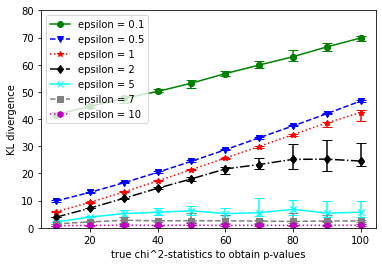

In [21]:
x = np.zeros(10)

for i in range(10):
    x[i] = i*10 + 10


fig = plt.figure()
plt.ylim(0,80)
plt.errorbar(x, p_chi_KL[:,0], yerr = p_chi_KL_err[:,:,0], capsize=5, fmt='o', ecolor='green', markeredgecolor = "green", color='green')
plt.plot(x, p_chi_KL[:,0], marker="o", color = "green", linestyle = "-", label = "epsilon = 0.1")
plt.errorbar(x, p_chi_KL[:,1], yerr = p_chi_KL_err[:,:,1], capsize=5, fmt='v', ecolor='blue', markeredgecolor = "blue", color='blue')
plt.plot(x, p_chi_KL[:,1], marker="v", color = "blue", linestyle = "--", label = "epsilon = 0.5")
plt.errorbar(x, p_chi_KL[:,2], yerr = p_chi_KL_err[:,:,2], capsize=5, fmt='*', ecolor='red', markeredgecolor = "red", color='red')
plt.plot(x, p_chi_KL[:,2], marker="*", color = "red", linestyle = "dotted", label = "epsilon = 1")
plt.errorbar(x, p_chi_KL[:,3], yerr = p_chi_KL_err[:,:,3], capsize=5, fmt='d', ecolor='black', markeredgecolor = "black", color='black')
plt.plot(x, p_chi_KL[:,3], marker="d", color = "black", linestyle = "dashdot", label = "epsilon = 2")
plt.errorbar(x, p_chi_KL[:,4], yerr = p_chi_KL_err[:,:,4], capsize=5, fmt='x', ecolor='cyan', markeredgecolor = "cyan", color='cyan')
plt.plot(x, p_chi_KL[:,4], marker="x", color = "cyan", linestyle = "-", label = "epsilon = 5")
plt.errorbar(x, p_chi_KL[:,5], yerr = p_chi_KL_err[:,:,5], capsize=5, fmt='s', ecolor='gray', markeredgecolor = "gray", color='gray')
plt.plot(x, p_chi_KL[:,5], marker="s", color = "gray", linestyle = "--", label = "epsilon = 7")
plt.errorbar(x, p_chi_KL[:,6], yerr = p_chi_KL_err[:,:,6], capsize=5, fmt='h', ecolor='m', markeredgecolor = "m", color='m')
plt.plot(x, p_chi_KL[:,6], marker="h", color = "m", linestyle = "dotted", label = "epsilon = 10")
plt.legend()
plt.xlabel("true chi^2-statistics to obtain p-values")
plt.ylabel("KL divergence")
fig.savefig("CA_p_chi^2_N=100000.png")